In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Explanation of the dataset

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

| Column Name      | Data Type   | Description                                                                                   | Possible Values |
|------------------|------------|-----------------------------------------------------------------------------------------------|----------------|
| `age`            | Integer    | The age of the individual.                                                                    | Continuous     |
| `workclass`      | Categorical | Employment status of the individual.                                                          | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked |
| `fnlwgt`         | Integer    | Final weight; a weighting assigned to the individual.                                         | Continuous     |
| `education`      | Categorical | Highest level of education achieved.                                                          | Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool |
| `education-num`  | Integer    | Number of years of education completed.                                                       | Continuous     |
| `marital-status` | Categorical | Marital status of the individual.                                                             | Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse |
| `occupation`     | Categorical | Type of work the individual performs.                                                         | Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces |
| `relationship`   | Categorical | Relationship status within the household.                                                     | Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried |
| `race`           | Categorical | The race of the individual.                                                                   | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black |
| `sex`            | Categorical | The gender of the individual.                                                                | Female, Male |
| `capital-gain`   | Integer    | Income from investment sources apart from salary/wages.                                      | Continuous     |
| `capital-loss`   | Integer    | Losses from investment sources apart from salary/wages.                                      | Continuous     |
| `hours-per-week` | Integer    | The number of hours worked per week.                                                          | Continuous     |
| `native-country` | Categorical | Country of birth of the individual.                                                           | United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinidad&Tobago, Peru, Hong, Holand-Netherlands |
| `income`         | Categorical | The income bracket of the individual.                                                        | >50K, <=50K |



In [132]:
# Read Data
df = pd.read_csv('../data/adult.csv')

# Numerical Data
numerical_columns = [
    'age',
    'fnlwgt',
    'education-num',
    'capital-gain',
    'capital-loss',
    'hours-per-week'
]

# Categorical Data
categorical_columns = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'gender',
    'native-country',
    'income'
]



In [4]:
# Statistics of the data
df.describe()
# See data problems with nulls
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
### Data Engineering to reduce unneccessary features

# Clean Dataframe to Remove unknown values
mask = df.astype(str).apply(lambda x: x.str.contains(r'\?'))

# Entferne alle Zeilen, in denen mindestens ein "?" vorkommt
df = df[~mask.any(axis=1)]


# Remove all without pay
df = df[df['workclass'] != 'Without-pay']


# Create a dictionary mapping for the specific workclass categories
workclass_mapping = {
    'Local-gov': 'Government',
    'State-gov': 'Government',
    'Federal-gov': 'Government',
    'Self-emp-not-inc': 'Self-Employed',
    'Self-emp-inc': 'Self-Employed',
    'Private': 'Private'
}

# Apply the mapping and fill missing values with 'Other'
df['workclass_grouped'] = df['workclass'].map(workclass_mapping).fillna('Other')


# Example grouping dictionary
education_mapping = {
    'Preschool': 'Dropout',
    '1st-4th': 'Dropout',
    '5th-6th': 'Dropout',
    '7th-8th': 'Dropout',
    '9th': 'Dropout',
    '10th': 'Dropout',
    '11th': 'Dropout',
    '12th': 'Dropout',
    'HS-grad': 'HS-grad',
    'Some-college': 'Some-college',
    'Assoc-acdm': 'Associates',
    'Assoc-voc': 'Associates',
    'Bachelors': 'Bachelors',
    'Masters': 'Masters',
    'Prof-school': 'Advanced',
    'Doctorate': 'Advanced'
}

# Apply the mapping to create a new grouped education column
df['education_grouped'] = df['education'].map(education_mapping).fillna('Other')



# Feature engineering
df['captial_net'] = df['capital-gain']-df['capital-loss']

df['is_us'] = (df['native-country'] == 'United-States').astype(int)

df['is_white'] = (df['race'] == 'White').astype(int)

df['is_married'] = (df['marital-status'] == 'Married-civ-spouse').astype(int)

df.drop(['fnlwgt','educational-num','capital-loss','capital-gain','race','education'],axis=1,inplace=True)

In [106]:
df

,age,workclass,education,marital-status,occupation,relationship,gender,hours-per-week,native-country,income,captial_net,is_us,is_white,is_married
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Male,40,United-States,<=50K,0,1,0,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,Male,50,United-States,<=50K,0,1,1,1
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,Male,40,United-States,>50K,0,1,1,1
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Male,40,United-States,>50K,7688,1,0,1
5,34,Private,10th,Never-married,Other-service,Not-in-family,Male,30,United-States,<=50K,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,38,United-States,<=50K,0,1,1,1
48838,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,40,United-States,>50K,0,1,1,1
48839,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,Female,40,United-States,<=50K,0,1,1,0
48840,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,Male,20,United-States,<=50K,0,1,1,0


0        True
1        True
2        True
3        True
5        True
         ... 
48837    True
48838    True
48839    True
48840    True
48841    True
Name: workclass, Length: 45222, dtype: bool

In [135]:
categorical_columns = [
    'workclass_grouped',
    'education_grouped',
    'is_married',
    'occupation',
    'relationship',
    'is_white',
    'gender',
    'is_us',
    'income'
]

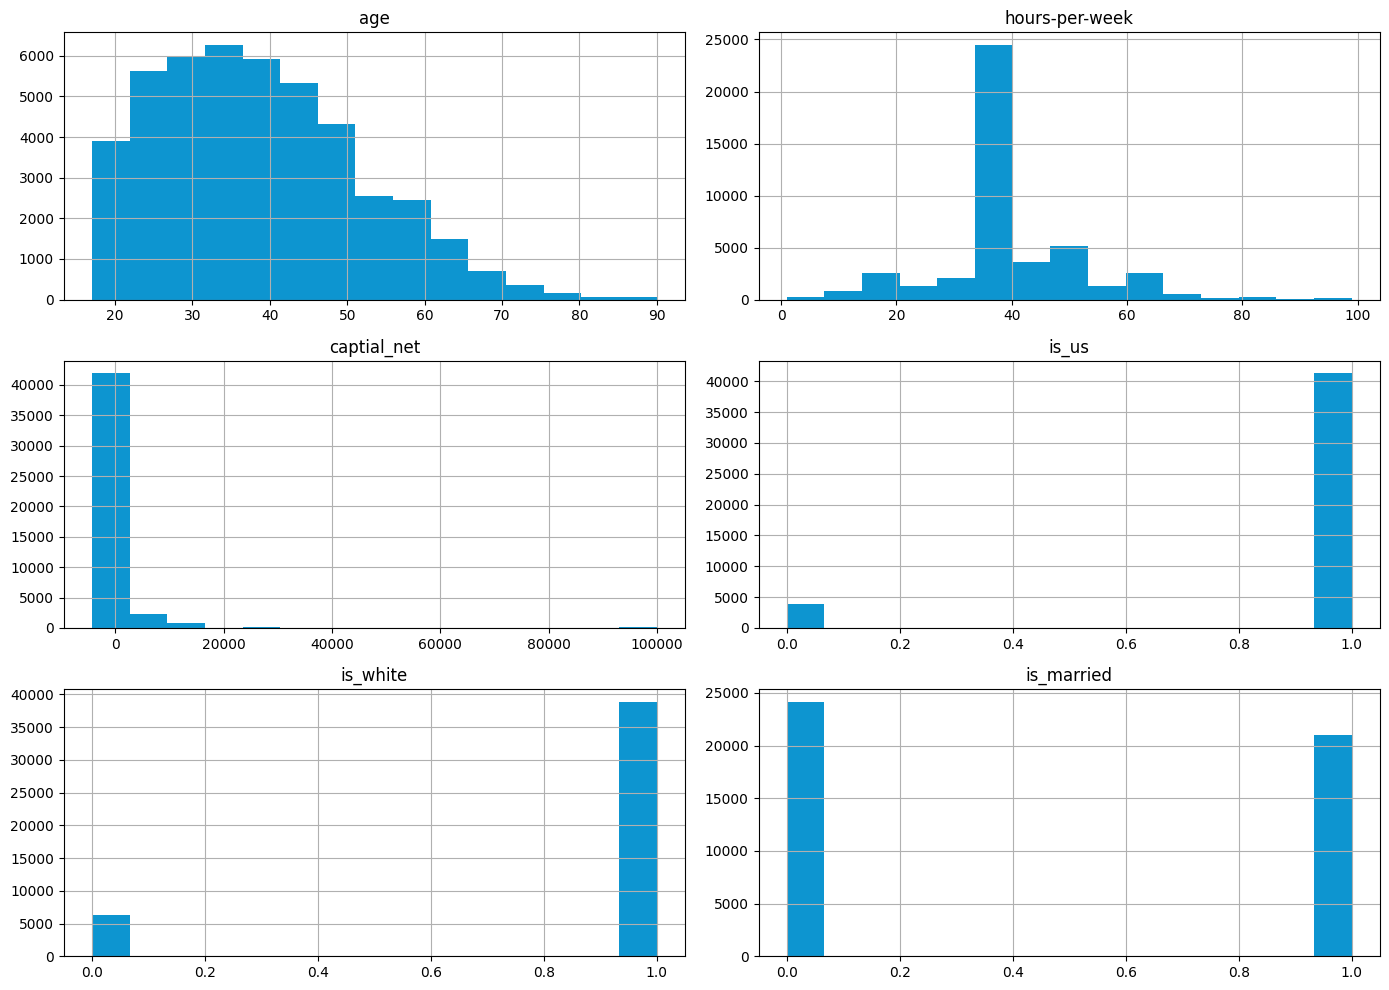

In [124]:
df.hist(bins=15,figsize=(14, 10),color='#0D95D0')
plt.tight_layout()
plt.show()

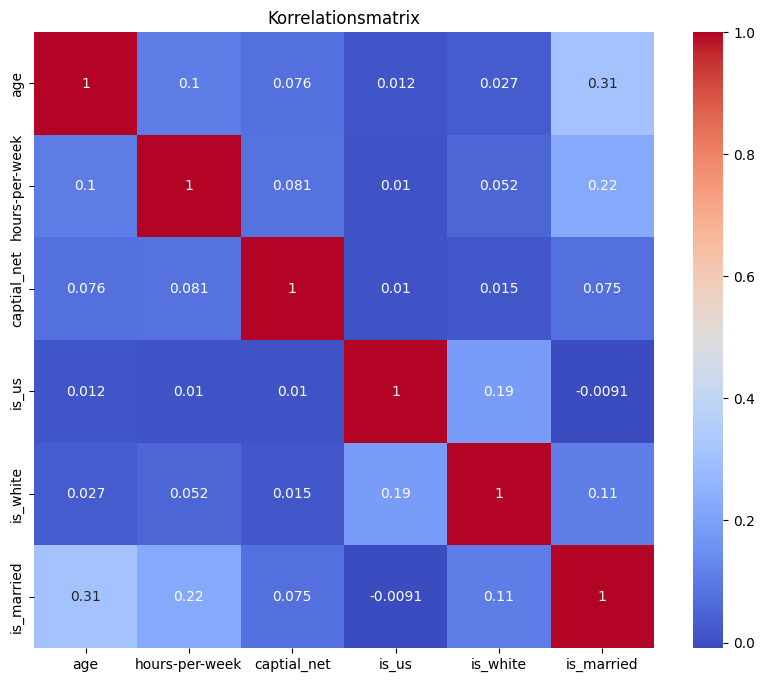

In [126]:
# Nur numerische Spalten auswählen
numeric_df = df.select_dtypes(include=["number"])

# Korrelationsmatrix berechnen
corr_matrix = numeric_df.corr()

# Visualisierung der Korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Korrelationsmatrix")
plt.show()


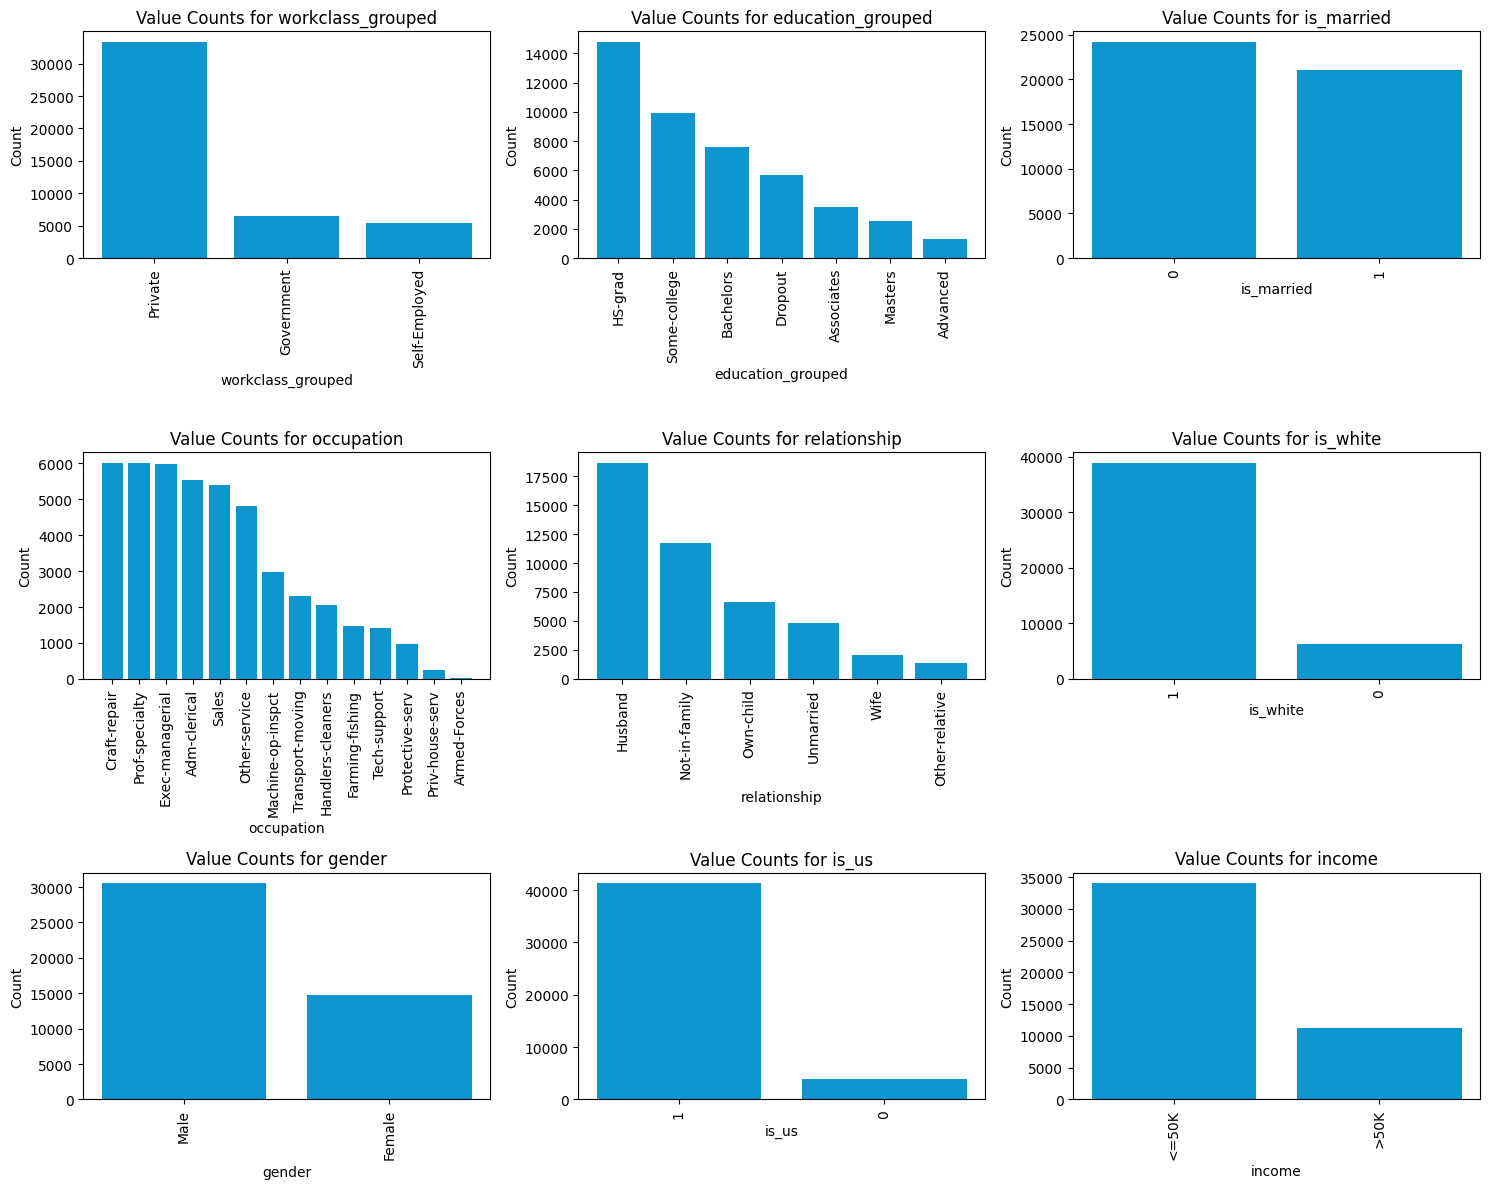

In [136]:
import matplotlib.pyplot as plt
import math

n_cols = 3
n_rows = math.ceil(len(categorical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # Flatten to simplify indexing

for idx, col in enumerate(categorical_columns):
    counts = df[col].value_counts()
    axes[idx].bar(counts.index.astype(str), counts.values, color='#0D95D0')
    axes[idx].set_title(f'Value Counts for {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=90)

# Hide any unused subplots (if the grid has more slots than columns)
for ax in axes[len(categorical_columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [137]:
df

,age,workclass,marital-status,occupation,relationship,gender,hours-per-week,native-country,income,workclass_grouped,education_grouped,captial_net,is_us,is_white,is_married
0,25,Private,Never-married,Machine-op-inspct,Own-child,Male,40,United-States,<=50K,Private,Dropout,0,1,0,0
1,38,Private,Married-civ-spouse,Farming-fishing,Husband,Male,50,United-States,<=50K,Private,HS-grad,0,1,1,1
2,28,Local-gov,Married-civ-spouse,Protective-serv,Husband,Male,40,United-States,>50K,Government,Associates,0,1,1,1
3,44,Private,Married-civ-spouse,Machine-op-inspct,Husband,Male,40,United-States,>50K,Private,Some-college,7688,1,0,1
5,34,Private,Never-married,Other-service,Not-in-family,Male,30,United-States,<=50K,Private,Dropout,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Married-civ-spouse,Tech-support,Wife,Female,38,United-States,<=50K,Private,Associates,0,1,1,1
48838,40,Private,Married-civ-spouse,Machine-op-inspct,Husband,Male,40,United-States,>50K,Private,HS-grad,0,1,1,1
48839,58,Private,Widowed,Adm-clerical,Unmarried,Female,40,United-States,<=50K,Private,HS-grad,0,1,1,0
48840,22,Private,Never-married,Adm-clerical,Own-child,Male,20,United-States,<=50K,Private,HS-grad,0,1,1,0
